# Proejct Name - Market Basket Analysis Using Association Rules

**Name - Sandip Salunkhe**

In [102]:
# Importing essential libraries for data analysis, visualization, and association rule mining
import numpy as np                  # For numerical operations
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For data visualization
# To display plots inline in Jupyter notebooks
%matplotlib inline
import seaborn as sns              # For advanced visualizations
import textwrap                    # For shortening long text in plots
from mlxtend.frequent_patterns import apriori, association_rules  # For market basket analysis
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

In [103]:
# Loads the dataset from 'online_retail.csv' into a DataFrame named df
df = pd.read_csv("online_retail.csv")

In [104]:
# Displays the first 5 rows of the DataFrame to preview the data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [105]:
# Displays the list of column names in the DataFrame
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [106]:
# Returns the number of rows and columns in the dataset as (rows, columns)
df.shape

(70847, 8)

In [107]:
# Summary statistics for numerical columns (count, mean, std, min, max, etc.)
df.describe()

,Quantity,Price,Customer ID
count,70846.000000,70846.000000,49579.000000
mean,10.506662,4.423751,15387.905807
std,90.421296,23.631543,1674.196474
min,-3669.000000,0.000000,12346.000000
25%,1.000000,1.250000,14063.000000
50%,3.000000,2.550000,15311.000000
75%,8.000000,4.650000,16805.000000
max,9312.000000,1998.490000,18287.000000


In [108]:
# Display dataset structure, data types, and missing values summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70847 entries, 0 to 70846
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      70847 non-null  object 
 1   StockCode    70847 non-null  object 
 2   Description  70428 non-null  object 
 3   Quantity     70846 non-null  float64
 4   InvoiceDate  70846 non-null  object 
 5   Price        70846 non-null  float64
 6   Customer ID  49579 non-null  float64
 7   Country      70846 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.3+ MB


In [109]:
# check missing values
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,419
Quantity,1
InvoiceDate,1
Price,1
Customer ID,21268
Country,1


In [110]:
# drop missing values in customer id
df.dropna(subset = ['Customer ID'], inplace =True)

In [111]:
#Remove cancel orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [112]:
# convert date column to proper format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [113]:
# Check Unique Values in Country
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified'], dtype=object)

In [114]:
# we are focusing on one country
#we'll use united kingdom to simplify our first model
df = df[df['Country'] == 'United Kingdom']

In [115]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [116]:
# create basked format for only uk

basket = df.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)

In [117]:
# convert a quantites to binary (1/0)

basket = basket.applymap(lambda x: 1 if  x > 0 else 0)

In [118]:
# Remove Transactions with Only 1 Item
# Apriori works best when baskets have 2+ items.

basket = basket[basket.sum(axis=1)>1]

In [119]:
# Preview final basket
basket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,FLAMINGO LIGHTS,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Apply Apriori Algorithm

# we'll find item combinations (itemsets) that appear in at least 1% of transactions

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# view top itemsets

frequent_itemsets.sort_values(by='support', ascending=False).head()


,support,itemsets
606,0.225495,(WHITE HANGING HEART T-LIGHT HOLDER)
477,0.117318,(SCOTTIE DOG HOT WATER BOTTLE)
407,0.103098,(RED SPOT HEART HOT WATER BOTTLE)
253,0.101574,(HOT WATER BOTTLE TEA AND SYMPATHY)
543,0.094972,(STRAWBERRY CERAMIC TRINKET BOX)


In [121]:
# generate association rules
# now we turn those itemsets into rules like:

# if a and b are bought, then c  is likely to be bought too.

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Convert confidence and support to percentage format
rules['confidence_percent'] = (rules['confidence'] * 100).round(2)
rules['support_percent'] = (rules['support'] * 100).round(2)

# view top rules sorted by lift
rules.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,confidence_percent,support_percent
450653,"(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...","(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",0.011681,0.014220,0.011681,1.000000,70.321429,1.0,0.011515,inf,0.997431,0.821429,1.000000,0.910714,100.00,1.17
450657,"(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...","(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",0.011681,0.014220,0.011681,1.000000,70.321429,1.0,0.011515,inf,0.997431,0.821429,1.000000,0.910714,100.00,1.17
450633,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN FRA...","(WOOD 2 DRAWER CABINET WHITE FINISH, EDWARDIAN...",0.014220,0.011681,0.011681,0.821429,70.321429,1.0,0.011515,5.534586,1.000000,0.821429,0.819318,0.910714,82.14,1.17
526575,"(EDWARDIAN PARASOL RED, RED HANGING HEART T-LI...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD 2 DR...",0.014220,0.011681,0.011681,0.821429,70.321429,1.0,0.011515,5.534586,1.000000,0.821429,0.819318,0.910714,82.14,1.17
526504,"(EDWARDIAN PARASOL RED, WOOD 2 DRAWER CABINET ...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD S/3 ...",0.014220,0.011681,0.011681,0.821429,70.321429,1.0,0.011515,5.534586,1.000000,0.821429,0.819318,0.910714,82.14,1.17


In [122]:
#  Filter Strong Rules.
#  filter rules for better quality, for example:

# Filter rules
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]

# Show cleaned output
strong_rules[['antecedents', 'consequents', 'support_percent', 'confidence_percent', 'lift']].head()

,antecedents,consequents,support_percent,confidence_percent,lift
0,( PEACE WOODEN BLOCK LETTERS),(LOVE BUILDING BLOCK WORD),1.27,71.43,10.118191
15,(LIGHT PINK CHERRY LIGHTS),( WHITE CHERRY LIGHTS),2.08,67.21,9.590045
16,( WHITE CHERRY LIGHTS),(PINK CHERRY LIGHTS),3.71,52.90,9.468841
17,(PINK CHERRY LIGHTS),( WHITE CHERRY LIGHTS),3.71,66.36,9.468841
38,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED SPOTTY),1.27,55.56,20.257202


In [123]:
#  Explore & Visualize Association Rules

# Basic Summary of Top Rules

# Now display the top rules with percentages
rules.sort_values(by='lift', ascending=False)[['antecedents','consequents','support_percent','confidence_percent','lift']].head(10)

,antecedents,consequents,support_percent,confidence_percent,lift
450653,"(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...","(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",1.17,100.00,70.321429
450657,"(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...","(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",1.17,100.00,70.321429
450633,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN FRA...","(WOOD 2 DRAWER CABINET WHITE FINISH, EDWARDIAN...",1.17,82.14,70.321429
526575,"(EDWARDIAN PARASOL RED, RED HANGING HEART T-LI...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD 2 DR...",1.17,82.14,70.321429
526504,"(EDWARDIAN PARASOL RED, WOOD 2 DRAWER CABINET ...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD S/3 ...",1.17,82.14,70.321429
526507,"(EDWARDIAN PARASOL RED, WOOD 2 DRAWER CABINET ...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD S/3 ...",1.17,82.14,70.321429
526548,"(EDWARDIAN PARASOL RED, FANCY FONT HOME SWEET ...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD 2 DR...",1.17,82.14,70.321429
526551,"(EDWARDIAN PARASOL RED, UNION JACK GUNS & ROSE...","(WHITE HANGING HEART T-LIGHT HOLDER, WOOD 2 DR...",1.17,82.14,70.321429
323506,"(EDWARDIAN PARASOL RED, UNION JACK GUNS & ROSE...","(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...",1.17,82.14,70.321429
450647,"(EDWARDIAN PARASOL BLACK, LUNCHBOX WITH CUTLER...","(WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 ...",1.17,100.00,70.321429


In [124]:
# Filter strong rules
strong_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

# Display top 10 strong rules with percentage metrics
strong_rules[['antecedents', 'consequents', 'support_percent', 'confidence_percent', 'lift']].head(10)

,antecedents,consequents,support_percent,confidence_percent,lift
0,( PEACE WOODEN BLOCK LETTERS),(LOVE BUILDING BLOCK WORD),1.27,71.43,10.118191
15,(LIGHT PINK CHERRY LIGHTS),( WHITE CHERRY LIGHTS),2.08,67.21,9.590045
16,( WHITE CHERRY LIGHTS),(PINK CHERRY LIGHTS),3.71,52.90,9.468841
17,(PINK CHERRY LIGHTS),( WHITE CHERRY LIGHTS),3.71,66.36,9.468841
38,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED SPOTTY),1.27,55.56,20.257202
40,(12 PENCILS TALL TUBE RED SPOTTY),(12 PENCILS TALL TUBE SKULLS),1.32,63.41,26.013211
41,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE RED SPOTTY),1.32,54.17,26.013211
53,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),1.63,60.38,10.428335
55,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),2.34,58.23,10.057073
57,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETRO SPOT CAKE CASES),3.10,53.51,6.841479


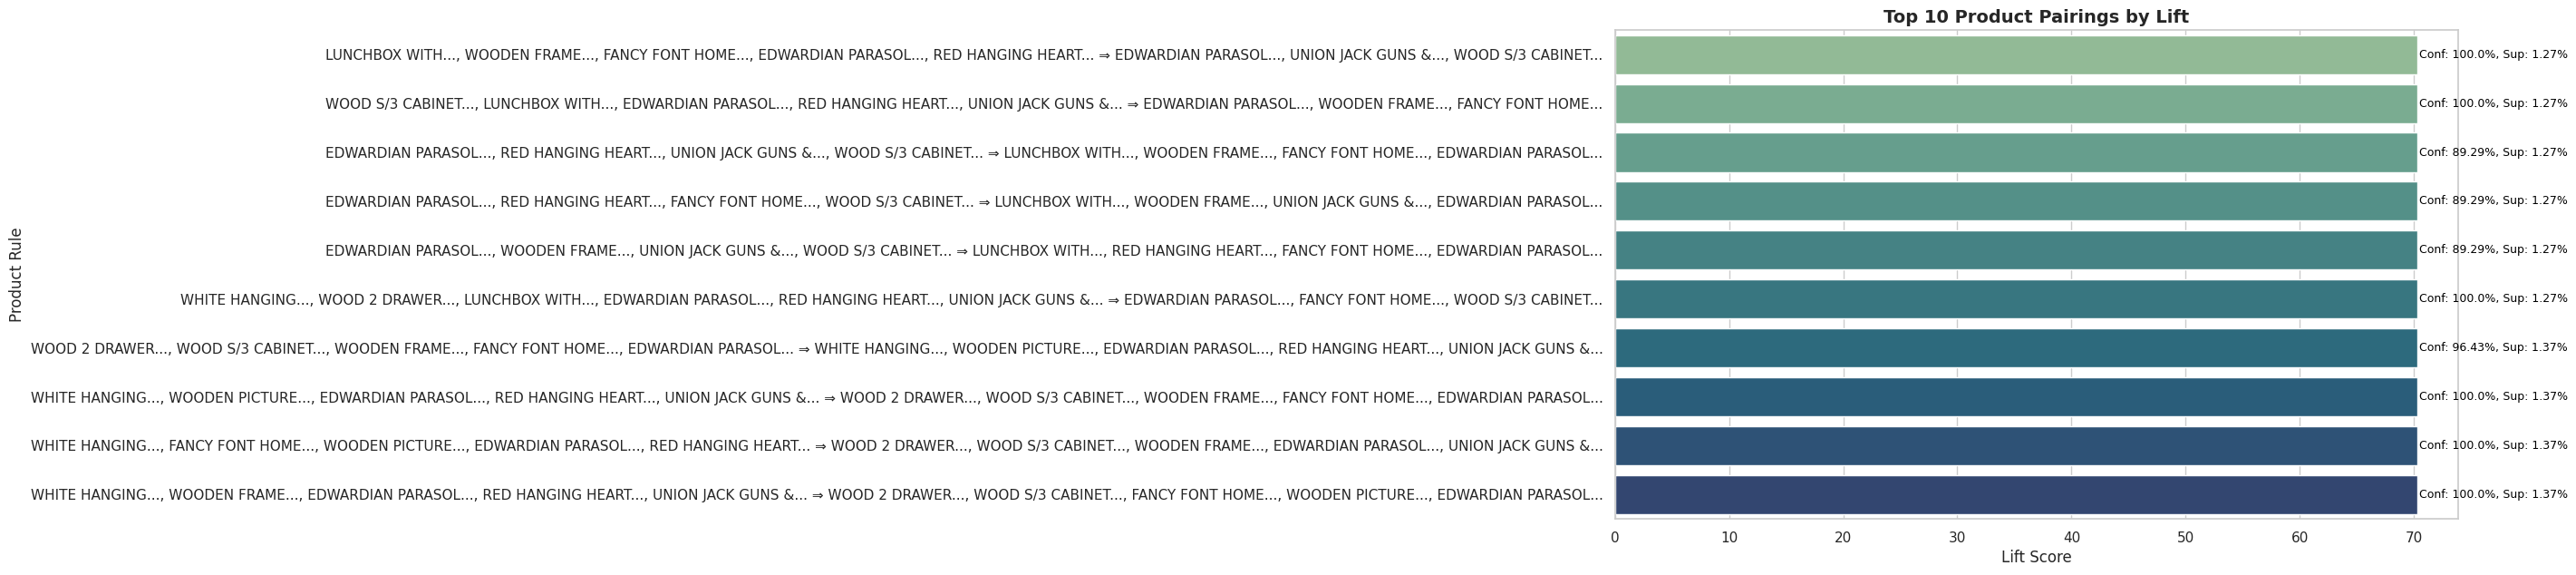

In [125]:
# Bar plot: Top 10 Rules by Lift

# Shorten item names
def shorten_items(item_set, max_len=20):
    return ', '.join([textwrap.shorten(str(i), width=max_len, placeholder='...') for i in item_set])

# Prepare top 10 rules
top_rules = strong_rules.sort_values(by='lift', ascending=False).head(10).copy()
top_rules['rule'] = top_rules.apply(
    lambda row: f"{shorten_items(row['antecedents'])} ⇒ {shorten_items(row['consequents'])}", axis=1
)

# Set up plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.set(style="whitegrid")

barplot = sns.barplot(
    y=top_rules['rule'],
    x=top_rules['lift'],
    palette='crest',
    ax=ax
)

# Annotate bars with confidence and support
for index, row in top_rules.iterrows():
    ax.text(
        row['lift'] + 0.1,
        top_rules.index.get_loc(index),
        f"Conf: {row['confidence_percent']}%, Sup: {row['support_percent']}%",
        va='center',
        fontsize=9,
        color='black'
    )

# Titles and layout
ax.set_title('Top 10 Product Pairings by Lift', fontsize=14, fontweight='bold')
ax.set_xlabel('Lift Score')
ax.set_ylabel('Product Rule')

plt.tight_layout()
plt.show()

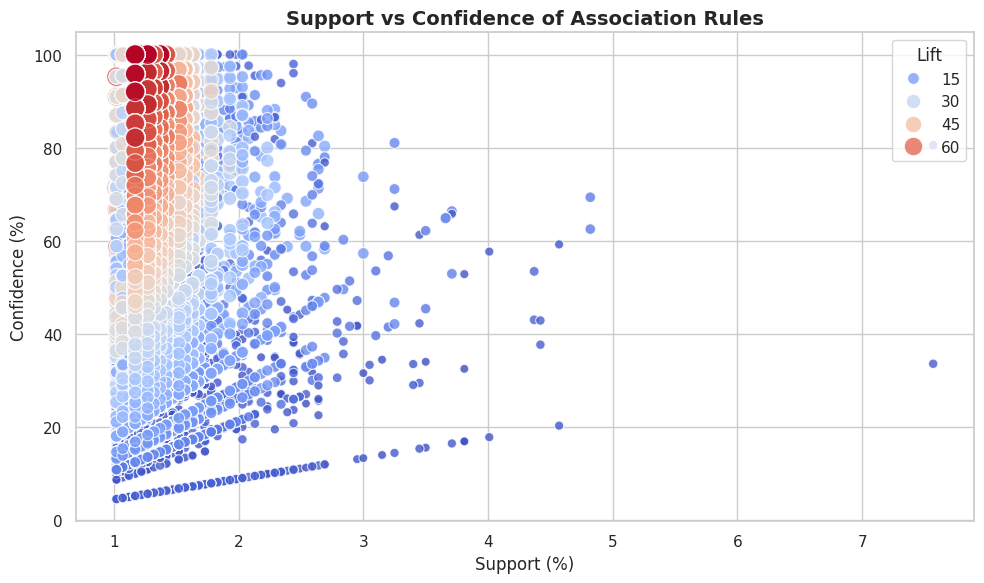

In [127]:
# Scatter Plot: Support vs Confindence

# Make sure percentage columns are created
rules['support_percent'] = (rules['support'] * 100).round(2)
rules['confidence_percent'] = (rules['confidence'] * 100).round(2)

# Set style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=rules,
    x='support_percent',
    y='confidence_percent',
    hue='lift',
    size='lift',
    palette='coolwarm',
    sizes=(40, 200),
    legend='brief',
    alpha=0.8
)

# Plot labels
plt.title('Support vs Confidence of Association Rules', fontsize=14, fontweight='bold')
plt.xlabel('Support (%)')
plt.ylabel('Confidence (%)')
plt.legend(loc='upper right', title='Lift')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 Conclusion

**Market Basket Analysis helped uncover product combinations that customers frequently purchase together. These insights are valuable for improving cross-selling, bundling strategies, and targeted marketing. Businesses can apply these findings to increase sales and enhance the shopping experience by offering more relevant product recommendations.**